<h1 style="color:#fce444;font-size:45px;font-family:Georgia;text-align:center;"><strong>🔌Energía de Electrodométicos🔋 <strong style="color:black;font-size:40px;font-family:Georgia;"> <strong style="color:#fce444;font-size:40px;font-family:Georgia;">Proyecto de Aprendizaje de maquinas simulado</strong></strong></strong></h1>
    


###  📊 Actividad de ML ejemplo de regresión

### Descripción del problema:

En este trabajo, se cuenta con un conjunto de datos que registra el consumo de energía de los electrodomésticos en una vivienda durante aproximadamente 4.5 meses. Este registro incluye variables como la temperatura y la humedad en diferentes áreas de la casa, la temperatura y la humedad externas, la presión atmosférica, la velocidad del viento, la visibilidad y el punto de rocío, todos recolectados de una estación meteorológica cercana. También se incluyen dos variables aleatorias que el autor original del conjunto de datos incluyó para probar modelos de regresión y filtrar atributos no predictivos.

### Objetivo del proyecto:

El objetivo de este proyecto es construir un modelo de aprendizaje automático que pueda predecir el consumo de energía de los electrodomésticos en la vivienda basándose en las características ambientales disponibles en el conjunto de datos. Este modelo puede ser de gran utilidad para entender cómo diferentes factores, tanto internos como externos, pueden influir en el consumo de energía de los electrodomésticos. A largo plazo, este conocimiento podría utilizarse para desarrollar estrategias de ahorro de energía o para diseñar sistemas de automatización del hogar más eficientes en términos de energía.

Para lograr este objetivo, se llevarán a cabo los siguientes pasos:

1. **Inspeccionar y mejorar la calidad de los datos:** Esto implica entender la estructura y las características de los datos, lidiar con los valores faltantes o erróneos, y posiblemente transformar los datos para hacerlos más adecuados para los algoritmos de aprendizaje automático.

2. **Diseñar y llevar a cabo experimentos para ajustar los parámetros del modelo:** Esto conlleva seleccionar un algoritmo de aprendizaje automático (o varios) para el modelo, y luego experimentar con diferentes configuraciones de parámetros para encontrar la que ofrece el mejor rendimiento.

3. **Evaluar y comparar el rendimiento de los modelos implementados:** Finalmente, una vez que se haya entrenado el modelos, procedemos a evaluar su rendimiento utilizando métricas apropiadas y posiblemente comparar diferentes modelos para ver cuál funciona mejor.


### Descripción de las variables:
- **T1**:
Temperatura en la zona de la cocina, en grados Celsius

- **RH_1**:
Humedad en la zona de la cocina, en %.

- **T2**:
Temperatura en la zona del salón, en grados Celsius

- **RH_2**:
Humedad en la zona del salón, en %.

- **T3**:
Temperatura en la zona del lavadero

- **RH_3**:
Humedad en la zona del lavadero, en %.

- **T4**:
Humedad en la oficina, en %.

- **RH_4**:
Humedad en la oficina, en %.

- **T5**:
Temperatura en el cuarto de baño, en grados Celsius

- **T6**:
Temperatura en el exterior del edificio (lado norte), en grados Celsius

- **RH_6**:
Humedad en el exterior del edificio (lado norte), en %.

- **T7**:
Temperatura en el cuarto de plancha, en grados Celsius

- **RH_7**:
Humedad en el cuarto de planchado, en %.

- **T8**:
Temperatura en la habitación del adolescente 2, en grados Celsius

- **RH_8**:
Humedad en la habitación de los adolescentes 2, en %.

- **T9**:
Temperatura en la habitación de los padres, en grados Celsius

- **RH_9**:
Humedad en la habitación de los padres, en %.

- **To**:
Temperatura exterior (de la estación meteorológica de Chievres), en Celsius

- **Pressure**:
Presión de la estación meteorológica de Chievres, en mm Hg

- **RH_out**:
Humedad exterior (de la estación meteorológica de Chievres), en %.

- **Wind speed**:
Velocidad del viento de la estación meteorológica de Chievres, en m/s

- **Visibility**:
Visibilidad de la estación meteorológica de Chievres, en km

- **Tdewpoint**:
De la estación meteorológica de Chievres, en Â°C

- **rv1**:
Variable aleatoria 1, adimensional

- **rv2**:
Variable aleatoria 2, no dimensional

- **Payment_Behaviour**:
Representa el comportamiento de pago del cliente (en USD)

- **Monthly_Balance**:
Representa el importe del saldo mensual del cliente (en USD)

- **Credit_Score**:
Representa el rango de la calificación crediticia (mala, normal, buena)


### Importando librerías

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

### Cargando el conjunto de datos

In [25]:
for dirname, _, filenames in os.walk('files'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

files/energydata_complete.csv


In [26]:
df = pd.read_csv('files/energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [27]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [28]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [29]:
df.dtypes


date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [30]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [31]:
df.shape

(19735, 29)

In [32]:
df.size

572315

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [34]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [35]:
df.isnull().sum()


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [36]:
df.skew()

/var/folders/ld/g46v1vjx41qc0t77b_lw34fh0000gp/T/ipykernel_86462/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64

Text(0.5, 1.0, 'Correlación entre las diferentes características')

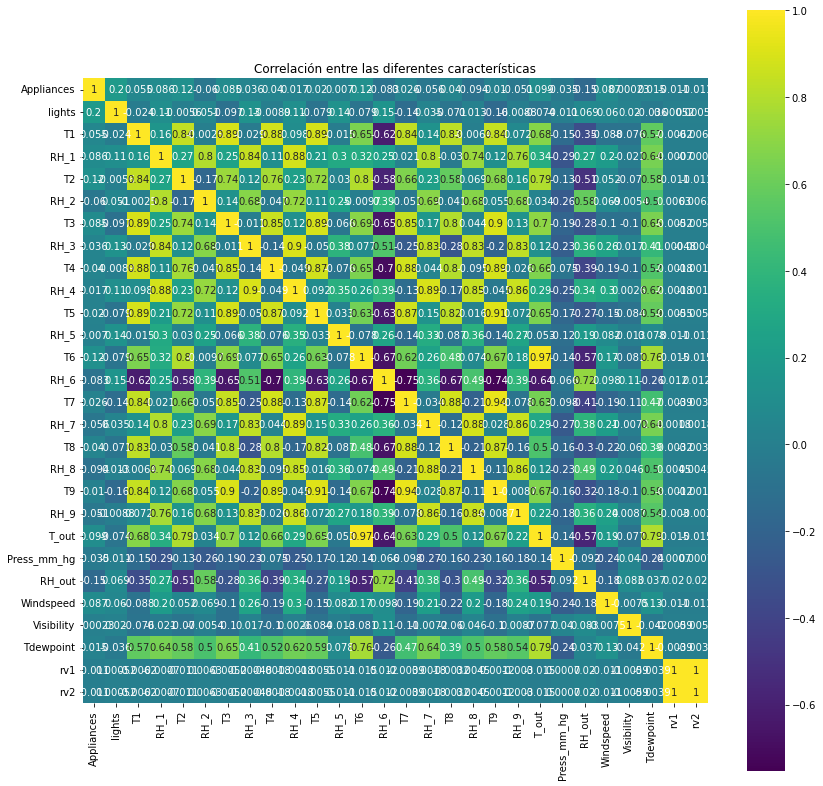

In [37]:
correlation = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlación entre las diferentes características')

<AxesSubplot:xlabel='Appliances', ylabel='Count'>

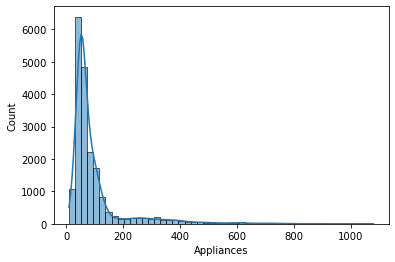

In [38]:
sns.histplot(df['Appliances'], bins=50, kde=True)

### Limpieza de Datos

In [39]:
df.rename(columns = {'Appliances':'Appliances_energy'}, inplace = True)
df.rename(columns={'lights':'lights_energy'} ,inplace=True)
df.rename(columns={'T1':'T_kitchen'} ,inplace=True)
df.rename(columns={'RH_1':'RH_kitchen'} ,inplace=True)
df.rename(columns={'T2':'T_livingroom'} ,inplace=True)
df.rename(columns={'RH_2':'RH_livingroom'} ,inplace=True)
df.rename(columns={'T3':'T_laundryroom'} ,inplace=True)
df.rename(columns={'RH_3':'RH_laundryroom'} ,inplace=True)
df.rename(columns={'T4':'T_officeroom'} ,inplace=True)
df.rename(columns={'RH_4':'RH_officeroom'} ,inplace=True)
df.rename(columns={'T5':'T_bathroom'} ,inplace=True)
df.rename(columns={'RH_5':'RH_bathroom'} ,inplace=True)
df.rename(columns={'T6':'T_OutsideBuliding'} ,inplace=True)
df.rename(columns={'RH_6':'RH_OutsideBuilding'} ,inplace=True)
df.rename(columns={'T7':'T_ironingroom'} ,inplace=True)
df.rename(columns={'RH_7':'RH_ironingroom'} ,inplace=True)
df.rename(columns={'T8':'T_teenagerroom2'} ,inplace=True)
df.rename(columns={'RH_8':'RH_teenagerroom2'} ,inplace=True)
df.rename(columns={'T9':'T_parentsroom'} ,inplace=True)
df.rename(columns={'RH_9':'RH_parentsroom'} ,inplace=True)

In [40]:
df.columns


Index(['date', 'Appliances_energy', 'lights_energy', 'T_kitchen', 'RH_kitchen',
       'T_livingroom', 'RH_livingroom', 'T_laundryroom', 'RH_laundryroom',
       'T_officeroom', 'RH_officeroom', 'T_bathroom', 'RH_bathroom',
       'T_OutsideBuliding', 'RH_OutsideBuilding', 'T_ironingroom',
       'RH_ironingroom', 'T_teenagerroom2', 'RH_teenagerroom2',
       'T_parentsroom', 'RH_parentsroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [41]:
df['date'].dtype

dtype('O')

In [42]:
df['date'] = pd.to_datetime(df['date'])

In [43]:
df.dtypes

date                  datetime64[ns]
Appliances_energy              int64
lights_energy                  int64
T_kitchen                    float64
RH_kitchen                   float64
T_livingroom                 float64
RH_livingroom                float64
T_laundryroom                float64
RH_laundryroom               float64
T_officeroom                 float64
RH_officeroom                float64
T_bathroom                   float64
RH_bathroom                  float64
T_OutsideBuliding            float64
RH_OutsideBuilding           float64
T_ironingroom                float64
RH_ironingroom               float64
T_teenagerroom2              float64
RH_teenagerroom2             float64
T_parentsroom                float64
RH_parentsroom               float64
T_out                        float64
Press_mm_hg                  float64
RH_out                       float64
Windspeed                    float64
Visibility                   float64
Tdewpoint                    float64
r

In [44]:
df = df.drop(['rv1', 'rv2'], axis=1)

In [46]:
df.columns

Index(['date', 'Appliances_energy', 'lights_energy', 'T_kitchen', 'RH_kitchen',
       'T_livingroom', 'RH_livingroom', 'T_laundryroom', 'RH_laundryroom',
       'T_officeroom', 'RH_officeroom', 'T_bathroom', 'RH_bathroom',
       'T_OutsideBuliding', 'RH_OutsideBuilding', 'T_ironingroom',
       'RH_ironingroom', 'T_teenagerroom2', 'RH_teenagerroom2',
       'T_parentsroom', 'RH_parentsroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')

In [47]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['date'], axis=1)), columns=df.columns[1:])


In [49]:
df_scaled

,Appliances_energy,lights_energy,T_kitchen,RH_kitchen,T_livingroom,RH_livingroom,T_laundryroom,RH_laundryroom,T_officeroom,RH_officeroom,...,T_parentsroom,RH_parentsroom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour,day_of_week
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.217324,0.958136,-0.152647,-2.976328,0.822080,1.207694,2.091596,0.366975,0.794304,-1.499445
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.200778,0.965363,-0.174588,-2.962813,0.822080,1.071703,1.766584,0.343135,0.794304,-1.499445
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.233869,0.950910,-0.196529,-2.949298,0.822080,0.935713,1.441572,0.319294,0.794304,-1.499445
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-1.233869,0.926821,-0.218470,-2.935783,0.822080,0.799723,1.116559,0.295454,0.794304,-1.499445
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-1.233869,0.926821,-0.240411,-2.922268,0.822080,0.663733,0.791547,0.271613,0.794304,-1.499445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.022483,-0.479080,2.415962,1.583299,2.530318,0.394449,2.458745,0.590209,1.882026,1.511812,...,1.843571,1.261649,2.881489,-0.043599,-1.616282,-0.288198,-1.243314,2.282163,0.794304,0.515093
19731,-0.075056,-0.479080,2.374452,1.568221,2.468301,0.407788,2.425512,0.608646,1.882026,1.511812,...,1.843571,1.261649,2.856414,-0.043599,-1.593912,-0.220203,-1.172659,2.274216,0.794304,0.515093
19732,1.680659,0.781035,2.374452,1.592514,2.411103,0.576982,2.383971,0.752037,1.882026,1.544061,...,1.843571,1.261649,2.831338,-0.043599,-1.571542,-0.152208,-1.102004,2.266269,0.794304,0.515093
19733,3.143756,0.781035,2.374452,1.691361,2.313256,0.642694,2.304213,0.629130,1.882026,1.557883,...,1.843571,1.268273,2.806263,-0.043599,-1.549171,-0.084213,-1.031349,2.258322,0.794304,0.515093
